# load Albatros data for DAS analysis


Requires: xarray, gsw 
Can be installed with conda on conda-forge channel

In [2]:
from glob import glob

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

import gsw

In [29]:
def load_emso_nc(file, resample=None):

    ds = xr.open_dataset(file)
    ds = (ds
          .assign_coords(row=ds.time)
          .drop("time")
          .rename(row="time")
          .sortby("time")
         )

    dt = (ds.time.diff("time")/pd.Timedelta("1m")).median() # in minutes
    print(f"Median sampling interval = {float(dt)} minutes")

    # should despike prior to resampling (in principle) ...
    # resample
    if resample:
        ds = ds.resample(time=resample).mean()
    
    return ds

In [20]:
microcat_nc = "Emso_Ligure_Ouest_MII_Microcat_CSV_6272_aac2_400c.nc"

ds = load_emso_nc(microcat_nc, resample="20min")
da = ds.Temperature

Median sampling interval = 3.05 minutes


In [ ]:

reload = True
if 
    ds_aqua = xr.open_dataset(aquadopp)
else:
    aquadopp = "Emso_Ligure_Ouest_MII_Aquadopp_NetCDF_3bc5_e3b3_b8d8.nc"
    ds_aqua = load_emso_nc(aquadopp, resample="20min")
    ds_aqua.to_netcdf("aquaddopp.nc")



In [ ]:
ds_aqua.to_netcdf("aquaddopp.nc")

In [ ]:
ds_aqua["X_East"].plot()

---

## time series

Get order of amplitudes

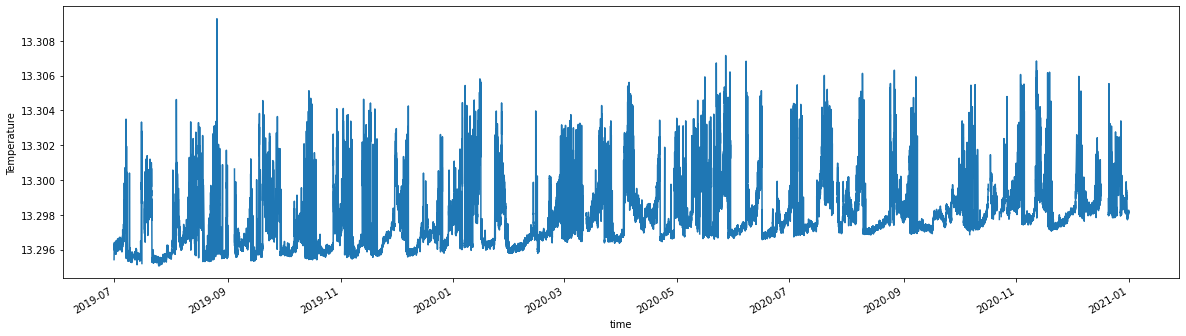

In [3]:
fig, ax = plt.subplots(1,1, figsize=(20,5))
da.plot()

### Weekly averaged data

Mild warming trend: $2 \; 10^{-3}$degC / year

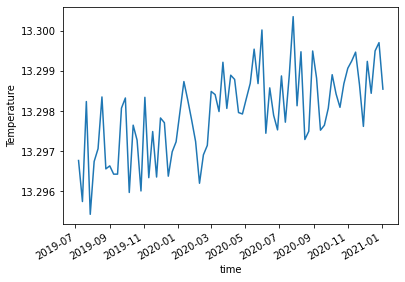

In [4]:
da.resample(time="1W").mean().plot()

### Annual composite

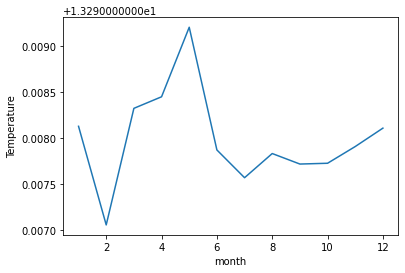

In [5]:
da.groupby("time.month").mean().plot()

### zoom July 2019

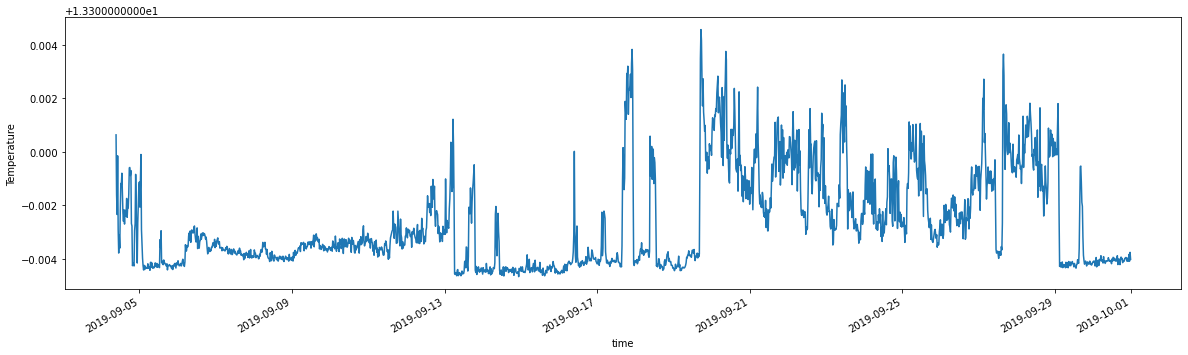

In [6]:
da.sel(time="2019-09").plot(figsize=(20,5))

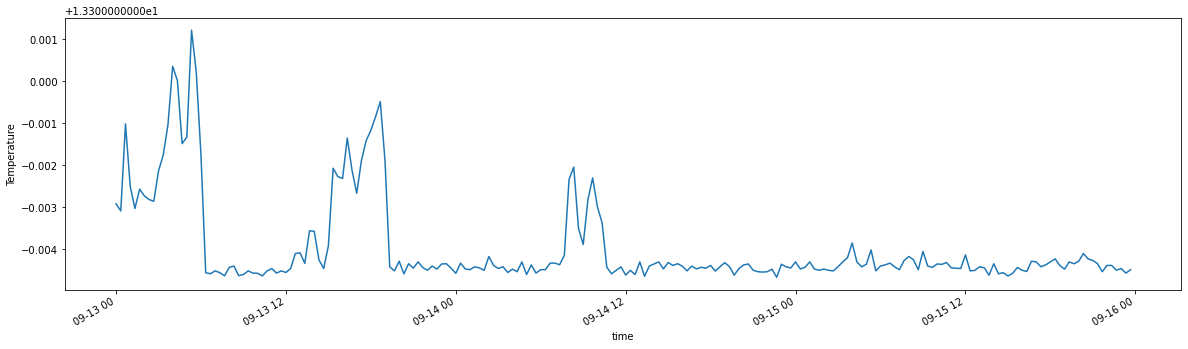

In [7]:
da.sel(time=slice("2019-09-13", "2019-09-15")).plot(figsize=(20,5))

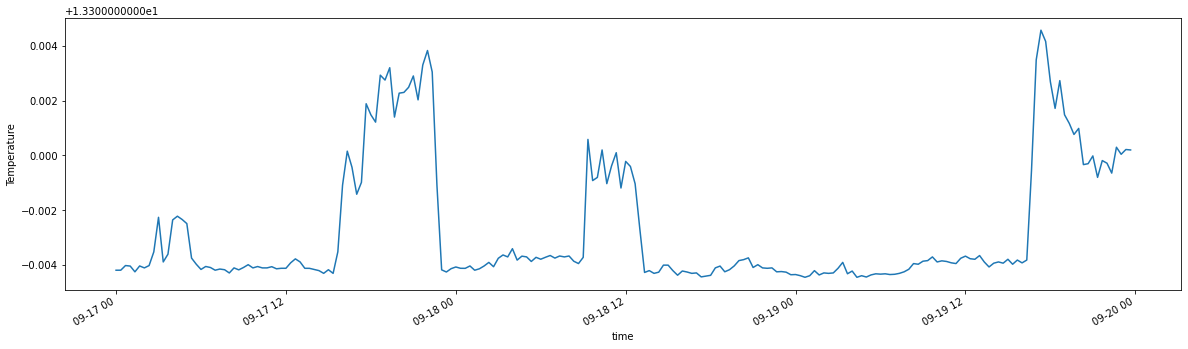

In [8]:
da.sel(time=slice("2019-09-17","2019-09-19")).plot(figsize=(20,5))

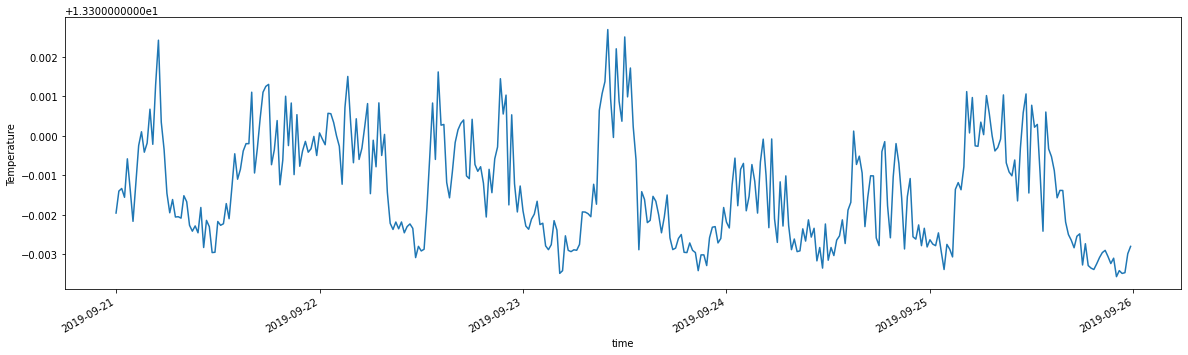

In [9]:
da.sel(time=slice("2019-09-21","2019-09-25")).plot(figsize=(20,5))

---

## inspect autocorrelation


In [10]:
import sstats.sigp as sigp

In [11]:
_da = da - da.mean()
_da = _da.fillna(0)
_da = _da.assign_coords(time=(da.time - da.time[0])/pd.Timedelta("1H"))
c = sigp.correlate(_da, _da).compute()

Full autocorrelation:

Text(0.5, 0, 'lags [hours]')

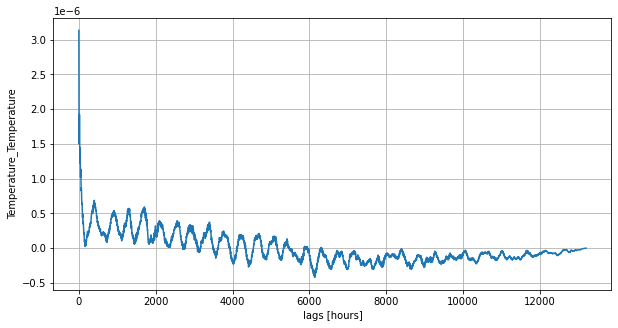

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
c.plot()
ax.grid()
ax.set_xlabel("lags [hours]")

Zoom in order to see the period of oscillations

Text(0.5, 0, 'lags [hours]')

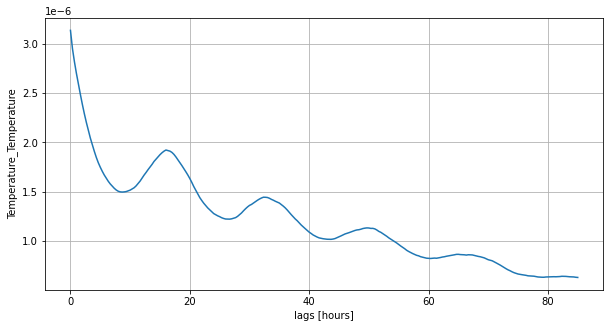

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
c.sel(lags=slice(0,17*5)).plot()
ax.grid()
ax.set_xlabel("lags [hours]")

In [4]:
import numpy as np
import matplotlib.pyplot as plt

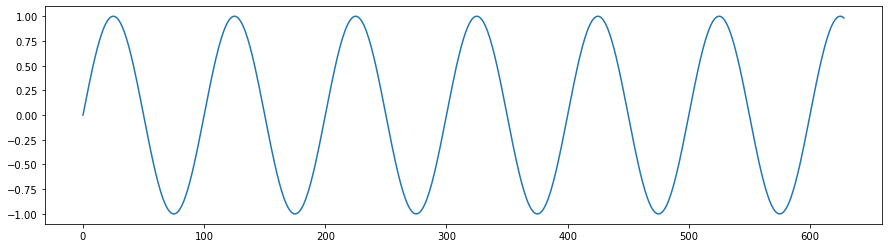

In [11]:
t = np.arange(0,2*np.pi*1,.01)
x = np.sin(2*np.pi*t)

fig, ax = plt.subplots(1,1, figsize=(15,4))
plt.plot(x)